# Load Data 

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

X_train = np.load('data/X_train.npy')
X_test = np.load('data/X_test.npy')
y_train = np.load('data/y_train.npy')
y_test = np.load('data/y_test.npy')
max_length = int(np.load('data/max.npy'))

In [13]:
# Create plots 
def create_plots(sample):
    '''
    :param rows: rows from ranges of taget values 
    :param data: data frame to use
    :return: plot of sigals, cwt and target response 
    '''

    plt.figure(figsize=(25,5))

    plt.subplot(1,4,1)
    plt.plot(X_train[sample, :, 0])

    plt.subplot(1,4,2)
    plt.plot(X_train[sample, :, 1])

    plt.subplot(1,4,3)
    plt.plot(X_train[sample, :, 2]) 
    
    plt.subplot(1,4,4)
    plt.text(0.35, 0.5, y_train[sample], dict(size=30))

    plt.show()           

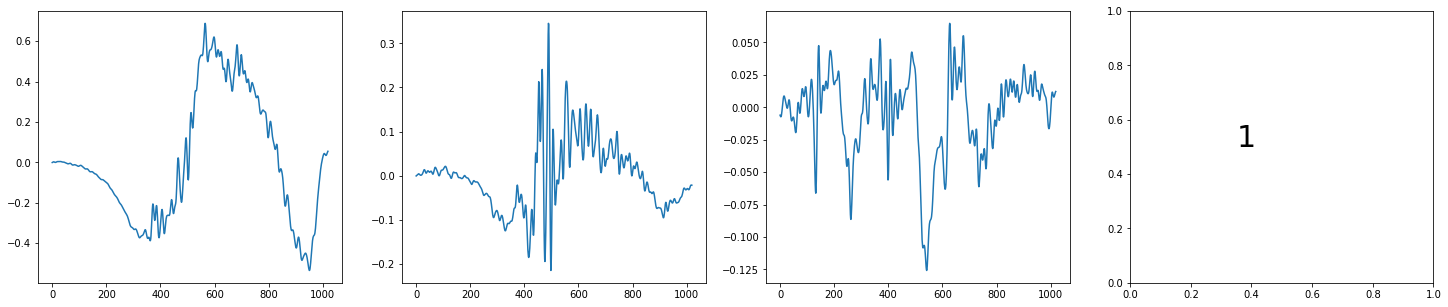

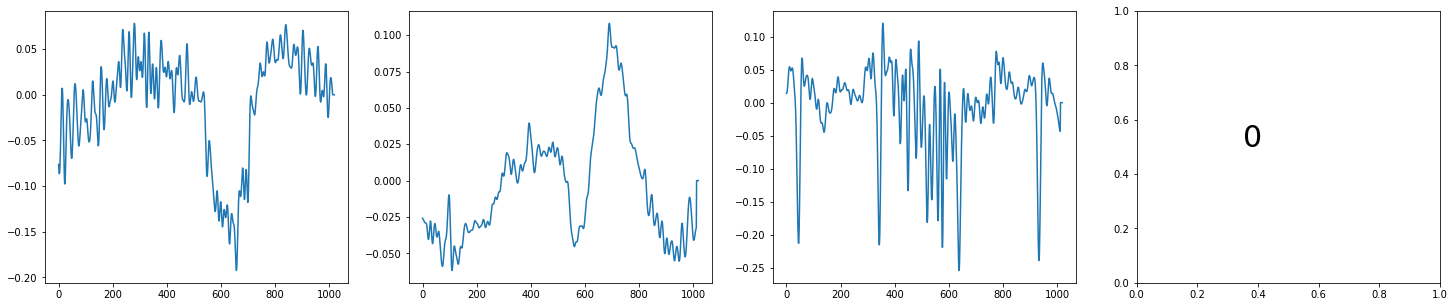

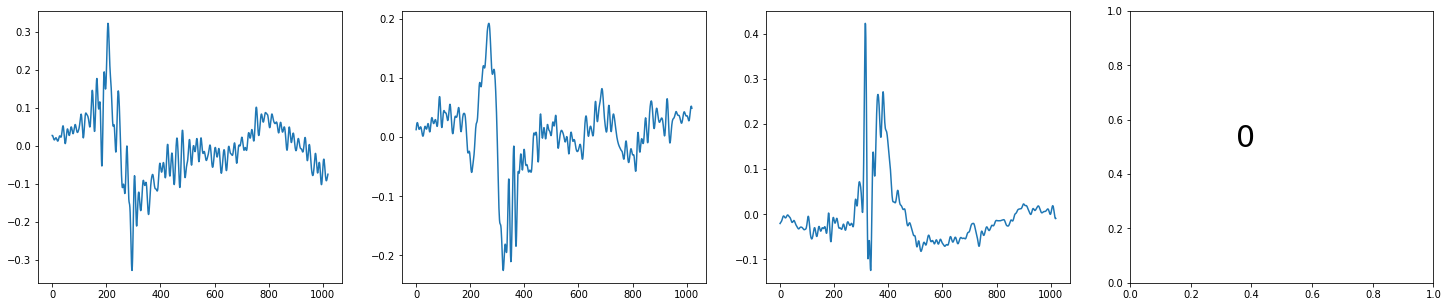

In [14]:
for i in [21,22,23]:
    create_plots(i)

In [15]:
from keras.utils import np_utils


if len(set(y_train)) ==  2:
    num_classes = 2
    activation = 'sigmoid'
    loss = 'binary_crossentropy'
    output = 1
else:
    num_classes = 10
    y_train = np_utils.to_categorical(y_train, num_classes)
    y_test = np_utils.to_categorical(y_test, num_classes)
    activation = 'softmax'
    loss = 'categorical_crossentropy'
    output = 10

# LSTM 

In [16]:
from keras.layers import LSTM
from keras import optimizers
from keras import layers
from keras import models
from keras.callbacks import History, EarlyStopping
from keras.utils import np_utils
history = History()


batch_size = 32
epochs = 20

model = models.Sequential()
model.add(LSTM(100, input_shape = (max_length, X_train.shape[-1])))
model.add(layers.Dense(80, activation='relu'))
model.add(layers.Dense(output, activation=activation))

model.compile(loss=loss,
              optimizer= optimizers.Adam(lr =0.0001),
              metrics=['accuracy'])


model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test),
          callbacks=[history, EarlyStopping(monitor='val_loss', patience=5)])


train_score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss: {}, Train accuracy: {}'.format(train_score[0], train_score[1]))
test_score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy: {}'.format(test_score[0], test_score[1]))

Train on 557 samples, validate on 62 samples
Epoch 1/20
557/557 [==============================] - 45s 81ms/step - loss: 0.6920 - acc: 0.5889 - val_loss: 0.6944 - val_acc: 0.5323
Epoch 2/20
557/557 [==============================] - 44s 79ms/step - loss: 0.6909 - acc: 0.5961 - val_loss: 0.6941 - val_acc: 0.5323
Epoch 3/20
557/557 [==============================] - 44s 79ms/step - loss: 0.6901 - acc: 0.5996 - val_loss: 0.6940 - val_acc: 0.5000
Epoch 4/20
557/557 [==============================] - 44s 79ms/step - loss: 0.6893 - acc: 0.5978 - val_loss: 0.6936 - val_acc: 0.5323
Epoch 5/20
557/557 [==============================] - 44s 79ms/step - loss: 0.6885 - acc: 0.5996 - val_loss: 0.6934 - val_acc: 0.5161
Epoch 6/20
557/557 [==============================] - 43s 78ms/step - loss: 0.6875 - acc: 0.5961 - val_loss: 0.6932 - val_acc: 0.5323
Epoch 7/20
557/557 [==============================] - 44s 78ms/step - loss: 0.6867 - acc: 0.5907 - val_loss: 0.6926 - val_acc: 0.5484
Epoch 8/20
557/55

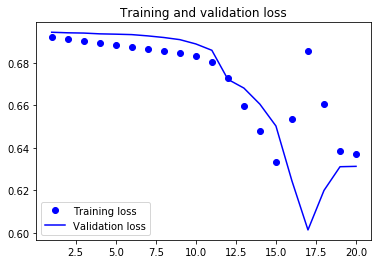

In [17]:
### Plot Losss
def plot_loss():
    acc = history.history['acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

plot_loss()

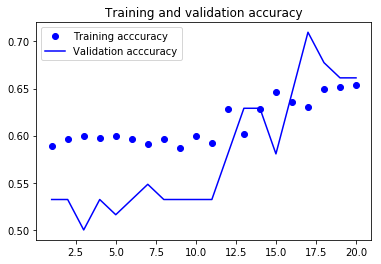

In [18]:
### Plot accuracy 

def plot_accuracy():
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    epochs = range(1, len(acc) + 1)
    plt.figure()
    plt.plot(epochs, acc, 'bo', label='Training acccuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation acccuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()
    
plot_accuracy()

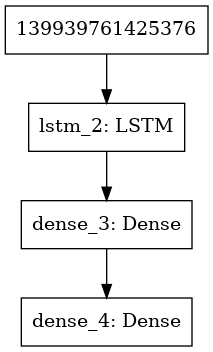

In [19]:
import pydot
from IPython.display import Image
from keras.utils import plot_model
plot_model(model, to_file='lstm.png')
Image(filename='lstm.png') 

In [20]:
#Test Data 

from sklearn.metrics import classification_report
import numpy as np

if y_train.shape == 10:
    y_test = np.argmax(y_test, axis=1) # Convert one-hot to index
y_pred = model.predict_classes(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.60      0.83      0.70        29
          1       0.77      0.52      0.62        33

avg / total       0.69      0.66      0.65        62



In [21]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[24,  5],
       [16, 17]])

In [22]:
# Prediction 

if y_train.shape == 10:
    y_test = np.argmax(y_test, axis=1) # Convert one-hot to index
y_pred = model.predict_classes(X_train)
print(classification_report(y_train, y_pred))

             precision    recall  f1-score   support

          0       0.62      0.82      0.70       283
          1       0.72      0.47      0.57       274

avg / total       0.67      0.65      0.64       557



# Bidirectional LSTM

In [16]:
from keras.layers import Bidirectional
history = History()

batch_size = 32
epochs = 20 

model = models.Sequential()
model.add(Bidirectional(LSTM(100), input_shape = (max_length, X_train.shape[-1])))
model.add(layers.Dense(80, activation='relu'))
model.add(layers.Dense(1, activation=activation))

model.compile(loss=loss,
              optimizer= optimizers.Adam(lr =0.0000003),
              metrics=['accuracy'])


model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test),
          callbacks=[history])

train_score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss: {}, Train accuracy: {}'.format(train_score[0], train_score[1]))
test_score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy: {}'.format(test_score[0], test_score[1]))

Train on 557 samples, validate on 62 samples
Epoch 1/20
557/557 [==============================] - 91s 163ms/step - loss: 0.6933 - acc: 0.5206 - val_loss: 0.6939 - val_acc: 0.5484
Epoch 2/20
557/557 [==============================] - 90s 161ms/step - loss: 0.6933 - acc: 0.5260 - val_loss: 0.6939 - val_acc: 0.5484
Epoch 3/20
557/557 [==============================] - 89s 160ms/step - loss: 0.6933 - acc: 0.5260 - val_loss: 0.6939 - val_acc: 0.5484
Epoch 4/20
557/557 [==============================] - 90s 161ms/step - loss: 0.6933 - acc: 0.5260 - val_loss: 0.6939 - val_acc: 0.5645
Epoch 5/20
557/557 [==============================] - 90s 161ms/step - loss: 0.6933 - acc: 0.5278 - val_loss: 0.6939 - val_acc: 0.5645
Epoch 6/20
557/557 [==============================] - 90s 161ms/step - loss: 0.6933 - acc: 0.5260 - val_loss: 0.6939 - val_acc: 0.5645
Epoch 7/20
557/557 [==============================] - 89s 160ms/step - loss: 0.6933 - acc: 0.5260 - val_loss: 0.6939 - val_acc: 0.5645
Epoch 8/20

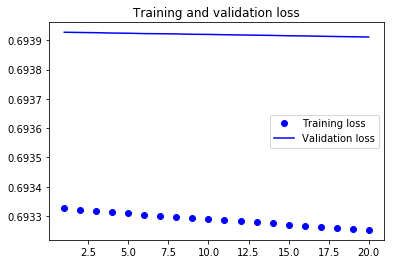

In [17]:
plot_loss()

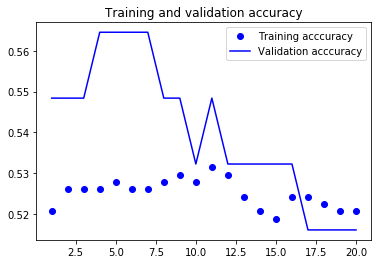

In [18]:
plot_accuracy()

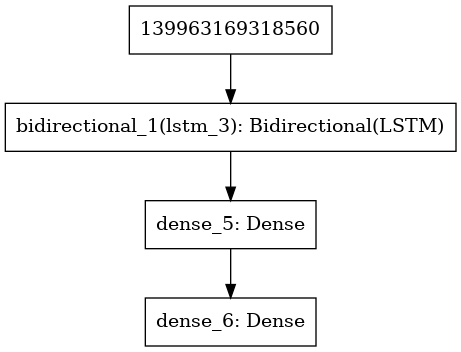

In [19]:
plot_model(model, to_file='lstm.png')
Image(filename='lstm.png') 

In [20]:
if y_train.shape == 10:
    y_test = np.argmax(y_test, axis=1) # Convert one-hot to index
y_pred = model.predict_classes(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.49      0.62      0.55        29
          1       0.56      0.42      0.48        33

avg / total       0.53      0.52      0.51        62



In [21]:
confusion_matrix(y_test, y_pred)

array([[18, 11],
       [19, 14]])